<a href="https://colab.research.google.com/github/dercodeKoenig/colab-KI/blob/main/xt_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir /root/.kaggle/
!echo '{"username":"bpwqsdd","key":"55c6bac7a9ea2f38dd966a1d1a4e31f8"}' > /root/.kaggle/kaggle.json
!pip uninstall kaggle -y
!python -m pip install kaggle

Found existing installation: kaggle 1.5.12
Uninstalling kaggle-1.5.12:
  Successfully uninstalled kaggle-1.5.12
     |████████████████████████████████| 58 kB 7.0 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=b67fd6a77bfbe4b0381d64e29e14c35477d0dfb16c3e094fd03990de5ecc43e9
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle


In [ ]:
!kaggle kernels output bpwqsdd/notebook5ab17ab441 -p data/

tcmalloc: large alloc 2302099456 bytes == 0x55f55e11c000 @  0x7fbf907ef1e7 0x55f4b60cc518 0x55f4b6096d17 0x55f4b6098d00 0x55f4b609a1cd 0x55f4b618cb3d 0x55f4b610e458 0x55f4b5fdad14 0x55f4b618cc51 0x55f4b61ba639 0x55f4b610a017 0x55f4b610902f 0x55f4b609c36c 0x55f4b609c571 0x55f4b610b633 0x55f4b610902f 0x55f4b609c36c 0x55f4b609c571 0x55f4b610b633 0x55f4b610902f 0x55f4b5fdae2b 0x55f4b610b633 0x55f4b610902f 0x55f4b609baba 0x55f4b610e2c0 0x55f4b610902f 0x55f4b609baba 0x55f4b610a108 0x55f4b610902f 0x55f4b609c36c 0x55f4b609c571
Output file downloaded to data/AUDUSD-2000-2020-15m.csv_X.npy
Output file downloaded to data/AUDUSD-2000-2020-15m.csv_Y.npy
tcmalloc: large alloc 2298937344 bytes == 0x55f55e188000 @  0x7fbf907ef1e7 0x55f4b60cc518 0x55f4b6096d17 0x55f4b6098d00 0x55f4b609a1cd 0x55f4b618cb3d 0x55f4b610e458 0x55f4b5fdad14 0x55f4b618cc51 0x55f4b61ba639 0x55f4b610a017 0x55f4b610902f 0x55f4b609c36c 0x55f4b609c571 0x55f4b610b633 0x55f4b610902f 0x55f4b609c36c 0x55f4b609c571 0x55f4b610b633 0x55f4

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output
from tqdm.notebook import tqdm
import gc

In [ ]:
ddir = "data/"

files = os.listdir(ddir)

xfiles = []
yfiles = []
for i in files:
    if "Y.npy" in i:
        yfiles.append(i)
    if "X.npy" in i:
        xfiles.append(i)
xfiles, yfiles        

pairs = []
for i in xfiles:
    for o in yfiles:
        if(i[:-5] == o[:-5]):
            pairs.append((i,o))
            
pairs
tc = pairs[0]

In [ ]:
seq_len = int(60 / 15 * 24 * 1.5)
nf = 8
resume = False
if resume == False:
    
    inputs = layers.Input(shape = (seq_len, 8))
    x = inputs
    
    x = tf.keras.layers.Conv1D(8,3, padding="same")(x)
    tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    x = tf.keras.layers.LSTM(8, activation = "tanh", return_sequences=True)(x)
    #x = TransformerBlock(x.shape[2], 4, 32)(x)

    x = tf.keras.layers.GRU(8, activation = "tanh", return_sequences=False)(x)
    
    x = tf.keras.layers.Dense(16, activation="relu")(x)
    
    outputs = tf.keras.layers.Dense(3, activation = "softmax")(x)
    
    model = tf.keras.Model(inputs, outputs)
    
    loss = tf.keras.losses.SparseCategoricalCrossentropy()
    #opt = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.95, nesterov=True)
    opt = tf.keras.optimizers.Adam(learning_rate=0.00002)
    model.compile(opt, loss, metrics="accuracy")

    
else:
    model = tf.keras.models.load_model("model_v12")
    
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 144, 8)]          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 144, 8)            200       
                                                                 
 lstm_2 (LSTM)               (None, 144, 8)            544       
                                                                 
 gru_2 (GRU)                 (None, 8)                 432       
                                                                 
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dense_5 (Dense)             (None, 3)                 51        
                                                                 
Total params: 1,371
Trainable params: 1,371
Non-trainable p

In [ ]:
X = np.load(ddir+tc[0])
Y = np.load(ddir+tc[1])

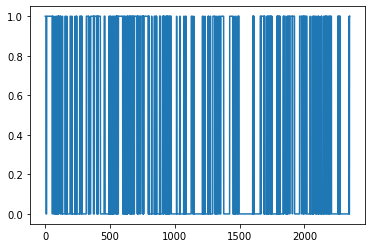

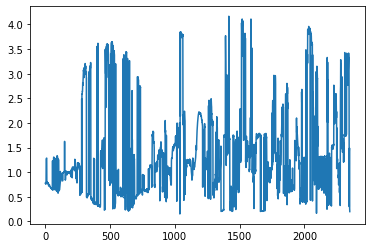

308 752 1060 1291


In [ ]:
accs = []
losses = []
twin = 0
tloss = 0
z = 0
sn = 300
for i in range(len(X)-sn-4*24):
    X_t = X[i:i+sn]
    Y_t = Y[i:i+sn]
    
    X_e = X[i+sn+4*24].reshape(1, -1, 8)
    Y_e = Y[i+sn+100+4*24].reshape(1, -1)
    
    model.fit(X_t, Y_t, batch_size = 8, verbose = 0, shuffle = False)
    loss, acc = model.evaluate(X_e, Y_e, verbose = 0)
    accs.append(acc)
    losses.append(loss)
    res = model.predict(X_e)

    for o in range(len(res)):
      p = np.argmax(res[o])

      if not p == 2:
        if p == Y_e[o]: twin+=1
        else: tloss+=1
      else: z+= 1
  
    if i%50 == 0:
      clear_output()
      plt.plot(accs)
      plt.show()
      plt.plot(losses)
      plt.show()
      print(twin, tloss, twin+tloss, z)

0 62 62
